In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("Final Config - Sheet2.csv")
data

,executor_instances,executor_memory,executor_cores,driver_memory,driver_cores,scheduler_mode,collectat,reducebykey,total
0,2,1,1,1,1,FIFO,5,49,54
1,3,1,1,1,1,FIFO,5,47,52
2,2,1,1,2,1,FIFO,5,48,53
3,2,1,1,4,1,FIFO,5,42,47
4,2,1,1,8,1,FIFO,4,35,39
5,2,1,2,1,1,FIFO,4,33,37
6,2,1,4,1,1,FIFO,3,29,32
7,2,1,6,1,1,FIFO,3,27,30
8,12,8,5,1,1,FIFO,7,29,36
9,6,12,4,1,1,FIFO,4,29,33


In [231]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
schedulermode_encoded=le.fit_transform(data['scheduler_mode'].values)
schedulermode_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [232]:
x = np.array(list(zip(data['executor_instances'],data['executor_memory'],data['executor_cores'],data['driver_memory'],data['driver_cores'],schedulermode_encoded)))
x

array([[ 2,  1,  1,  1,  1,  1],
       [ 2,  1,  1,  2,  1,  1],
       [ 2,  1,  1,  4,  1,  1],
       [ 2,  1,  1,  8,  1,  1],
       [ 2,  1,  2,  1,  1,  1],
       [ 2,  1,  4,  1,  1,  1],
       [ 2,  1,  6,  1,  1,  1],
       [12,  8,  5,  1,  1,  1],
       [ 6, 12,  4,  1,  1,  1],
       [ 6, 12,  4,  8,  4,  1],
       [12, 12,  6,  8,  4,  1],
       [ 2,  8,  2,  8,  2,  0],
       [ 4,  8,  2,  8,  2,  0],
       [ 4,  8,  4,  8,  2,  0],
       [ 4,  8,  4,  8,  4,  0],
       [ 6,  8,  4,  8,  4,  0],
       [ 4,  8,  6,  8,  4,  0],
       [ 3,  8,  6,  8,  6,  0],
       [10,  8,  6,  8,  4,  0],
       [12, 16,  6,  8,  6,  0],
       [15, 16,  6,  8,  6,  0],
       [15,  8,  6, 12,  6,  0],
       [15,  8,  6, 16,  6,  0],
       [20,  8,  6, 16,  6,  0],
       [15,  8,  6, 12,  6,  0],
       [15, 16,  6, 10,  6,  0],
       [10, 16,  6, 10,  6,  0],
       [10, 16,  4, 10,  6,  0],
       [ 8, 20,  4, 12,  4,  0],
       [15, 20,  6, 12,  6,  0]])

In [233]:
y = data.iloc[:,-2].values
y

array([49, 48, 48, 35, 33, 29, 27, 29, 29, 29, 19, 47, 38, 38, 36, 36, 36,
       36, 35, 16, 15, 26, 26, 39, 26, 16, 16, 29, 29, 15], dtype=int64)

In [234]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.2)

In [235]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_Train, Y_Train)

LinearRegression()

In [236]:
Y_Pred = regressor.predict(X_Test)

In [237]:
Y_Pred

array([29.45255481, 20.25363484, 19.38461336, 38.26797527, 44.29280177,
       20.63283088])

In [238]:
Y_Test

array([26, 16, 29, 38, 38, 29], dtype=int64)

In [239]:
from sklearn.metrics import accuracy_score, mean_squared_error
print("mse:",mean_squared_error(Y_Test, Y_Pred))

mse: 38.691648044800374


In [240]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_Train,Y_Train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [241]:
Y_Pred = rf.predict(X_Test)

In [242]:
Y_Pred

array([26.3, 20.6, 29.8, 35.3, 42.3, 29. ])

In [243]:
Y_Test

array([26, 16, 29, 38, 38, 29], dtype=int64)

In [244]:
from sklearn.metrics import accuracy_score, mean_squared_error
mse = mean_squared_error(Y_Test, Y_Pred)
print("mse:", mse)

mse: 7.945


In [250]:
import math
rmse = math.sqrt(mse)
rmse

2.8186876378910806

In [249]:
pred1=rf.predict([[15,16,6,10,6,1]])
print(pred1)
pred2=regressor.predict([[15,16,6,10,6,1]])
print(pred2)

[17.9]
[10.92881243]


Text(0.5, 0, 'Feature Importance')

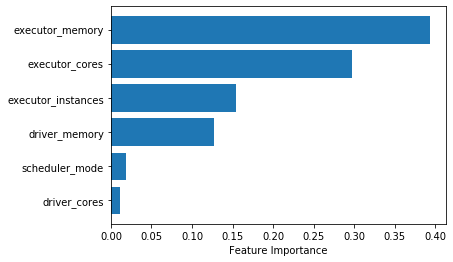

In [247]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])

import matplotlib.pyplot as plt
sort = rf.feature_importances_.argsort()
plt.barh(df.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [248]:
df = pd.DataFrame(x, columns = ['executor_instances','executor_memory','executor_cores','driver_memory','driver_cores','scheduler_mode'])


feature_importances_df = pd.DataFrame(
    {"feature":list(df.columns),"importance":rf.feature_importances_}
).sort_values("importance",ascending=False)

feature_importances_df

,feature,importance
1,executor_memory,0.393243
2,executor_cores,0.296695
0,executor_instances,0.153776
3,driver_memory,0.126833
5,scheduler_mode,0.018801
4,driver_cores,0.010651
